In [1]:
# resources
# https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
from matplotlib.legend_handler import HandlerLine2D

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titaniccleaningfeatureengineering/testC.csv
/kaggle/input/titaniccleaningfeatureengineering/__results__.html
/kaggle/input/titaniccleaningfeatureengineering/custom.css
/kaggle/input/titaniccleaningfeatureengineering/__notebook__.ipynb
/kaggle/input/titaniccleaningfeatureengineering/trainC.csv
/kaggle/input/titaniccleaningfeatureengineering/__output__.json
/kaggle/input/titaniccleaningfeatureengineering/__results___files/__results___13_0.png
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [3]:
train = pd.read_csv('../input/titaniccleaningfeatureengineering/trainC.csv')
test = pd.read_csv('../input/titaniccleaningfeatureengineering/testC.csv')
submission = pd.read_csv('../input/titanic/gender_submission.csv')

In [4]:
sc = MinMaxScaler()
X = sc.fit_transform(train[train.columns[1:]])
test = sc.fit_transform(test)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# baseline with default parametes
gbrt = GradientBoostingClassifier()
gbrt.fit(X_train, y_train)
print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

accuracy on training set: 0.987360
accuracy on test set: 0.944134


#default parameters

GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2,
min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [6]:
submission['Survived'] = gbrt.predict(test)
submission.to_csv("submission.csv", index = False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


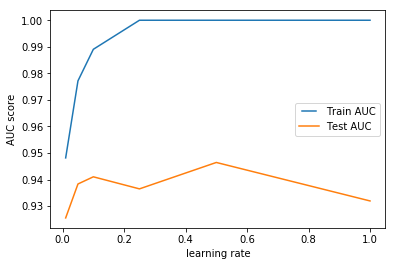

In [7]:
# learning_rate
# shrinks the contribution of each tree

learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []

for eta in learning_rates:
    gbrt = GradientBoostingClassifier(learning_rate=eta)
    gbrt.fit(X_train, y_train)
    train_pred = gbrt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = gbrt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
line1, = plt.plot(learning_rates, train_results, label='Train AUC')
line2, = plt.plot(learning_rates, test_results, label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

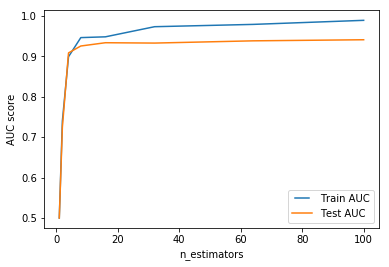

In [8]:
# N_estimators
# represents the number of trees in the forest
# the higher the number of trees the better to learn the data, but adding a lot of trees slows down the training proces

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100]
train_results = []
test_results = []

for estimator in n_estimators:
    gbrt = GradientBoostingClassifier(n_estimators=estimator)
    gbrt.fit(X_train, y_train)
    train_pred = gbrt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = gbrt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(n_estimators, train_results, label='Train AUC')
line2, = plt.plot(n_estimators, test_results, label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

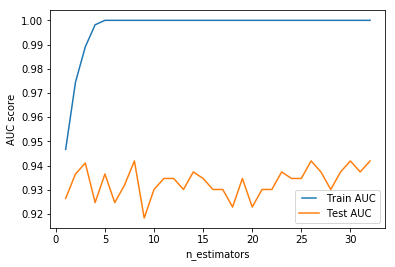

In [9]:
# max_depth
# how deep the built tree can be (the deeper the tree, the more information it captures)

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    gbrt = GradientBoostingClassifier(max_depth=max_depth)
    gbrt.fit(X_train, y_train)
    train_pred = gbrt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = gbrt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(max_depths, train_results, label='Train AUC')
line2, = plt.plot(max_depths, test_results, label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

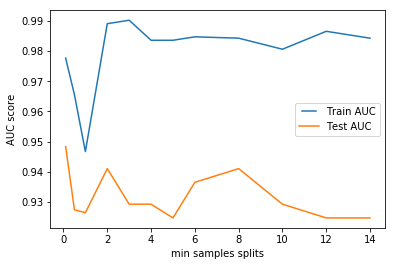

In [10]:
# min_samples_split
# represents the minimum number of samples required to split an internal node
# increase this parameter, the tree becomes more constrained as it has to consider more samples at each node

min_samples_splits = [0.1, 0.5, 1.0, 2, 3, 4, 5 ,6, 8, 10, 12, 14]
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    gbrt = GradientBoostingClassifier(min_samples_split=min_samples_split)
    gbrt.fit(X_train, y_train)
    train_pred = gbrt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = gbrt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(min_samples_splits, train_results, label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples splits')
plt.show()

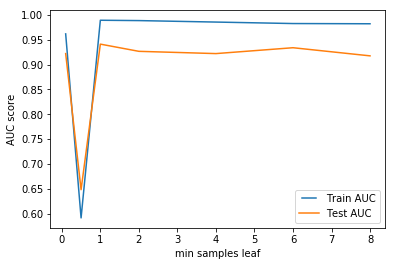

In [11]:
# min_samples_leaf
# the minimum number of samples required to be at a leaf node

min_samples_leafs = [0.1, 0.5, 1, 2, 4, 6, 8]
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    gbrt = GradientBoostingClassifier(min_samples_leaf=min_samples_leaf)
    gbrt.fit(X_train, y_train)
    train_pred = gbrt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = gbrt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
line1, = plt.plot(min_samples_leafs, train_results, label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

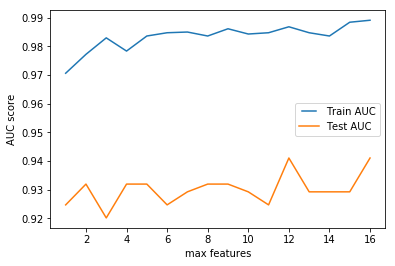

In [12]:
# max_features
# represents the number of features to consider when looking for the best split

max_features = list(range(1,train.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
    gbrt = GradientBoostingClassifier(max_features=max_feature)
    gbrt.fit(X_train, y_train)
    train_pred = gbrt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = gbrt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(max_features, train_results, label='Train AUC')
line2, = plt.plot(max_features, test_results, label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [13]:
# optimized parameters
#gbrt_opt = GradientBoostingClassifier( min_samples_split=0.7)
#gbrt_opt.fit(X_train, y_train)
#print("accuracy on training set: %f" % gbrt_opt.score(X_train, y_train))
#print("accuracy on test set: %f" % gbrt_opt.score(X_test, y_test))

In [14]:
learning_rates = [0.15, 0.1, 0.05]
n_estimators = [32, 64, 100]
max_depths = [3,5,7]
min_samples_splits =[1.0, 2, 4]
min_samples_leafs = [ 4, 5, 6]
max_features = [12,14,16]

param = { 'learning_rate' : learning_rates, 
         'n_estimators' : n_estimators, 
         'max_depth' : max_depths, 
         'min_samples_split' : min_samples_splits, 
         'min_samples_leaf' : min_samples_leafs,
         'max_features' : max_features,
        }
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
grid = GridSearchCV(GradientBoostingClassifier(), param, cv=cv, verbose = False, n_jobs=-1)
grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_le...
                                                  subsample=1.0, tol=0.0001,
                                                  validation_fraction=0.1,
                                                  verbose=0, warm_start=False),
            

In [15]:
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.9447761194029851
{'learning_rate': 0.15, 'max_depth': 5, 'max_features': 14, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 100}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=5,
                           max_features=14, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [16]:
submission['Survived'] = grid.predict(test)
submission.to_csv("submission_GridSearchCV.csv", index = False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
